## Global Imports

In [18]:
import pandas
import seaborn as sn
import os
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

## Setting Working Directory

In [2]:
os.chdir("D:\\personal_contents\\mycodes\\python_projects\\Ipython_Notebooks\\iim_project\\London-price-paid-house-price-data-since-1995-CSV")

## Reading London Dataset For Year 2013-14

In [3]:
data = pandas.read_csv("London Year_2013-2014.csv")
data_07_12 = pandas.read_csv("London Year_2007-2012.csv")
data = data.append(data_07_12)
del data_07_12

In [16]:
data.head()

,Postcode_district,Postcode_sector,Ward14,address1,address2,address3,address4,borough_code,borough_name,county,...,town,transaction_id,ward_code,ward_name,whether_new,whether_newbuild,year,year_month,month_string,price_bins
0,HA0,HA04,E05000085,NaN,,NaN,,E09000005,Brent,GREATER LONDON,...,WEMBLEY,{0FF377DF-DC87-4D54-90DC-5E200B155704},E05000085,NaN,NaN,N,2013,2013/1,January,"(-44949, 5504900]"
1,N16,N167,E05009373,NaN,,NaN,,E09000012,Hackney,GREATER LONDON,...,LONDON,{76742B18-E591-4C1C-AACA-9D9BA3C067AB},E05000238,NaN,NaN,N,2013,2013/1,January,"(-44949, 5504900]"
2,SW17,SW177,E05000618,NaN,FLAT 1,NaN,,E09000032,Wandsworth,GREATER LONDON,...,LONDON,{4D71DE37-9898-4983-AC71-7A464FBB0878},E05000618,NaN,NaN,N,2013,2013/1,January,"(-44949, 5504900]"
3,BR1,BR12,E05000106,NaN,FLAT 7,NaN,,E09000006,Bromley,GREATER LONDON,...,BROMLEY,{F850DE7C-D297-4360-82B5-4E4DDC149E55},E05000106,NaN,NaN,N,2013,2013/1,January,"(-44949, 5504900]"
4,BR2,BR28,E05000108,NaN,,NaN,,E09000006,Bromley,GREATER LONDON,...,BROMLEY,{38152E09-DD38-4CC8-B58B-E3AE45EFA543},E05000108,NaN,NaN,N,2013,2013/1,January,"(-44949, 5504900]"


## Feature Engineering 

In [4]:
data["month_string"] = data.month.map({1: "January", 2 : "February", 3 : "March", 4 :"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December" })

## Sales And Frequency Across Boroughs

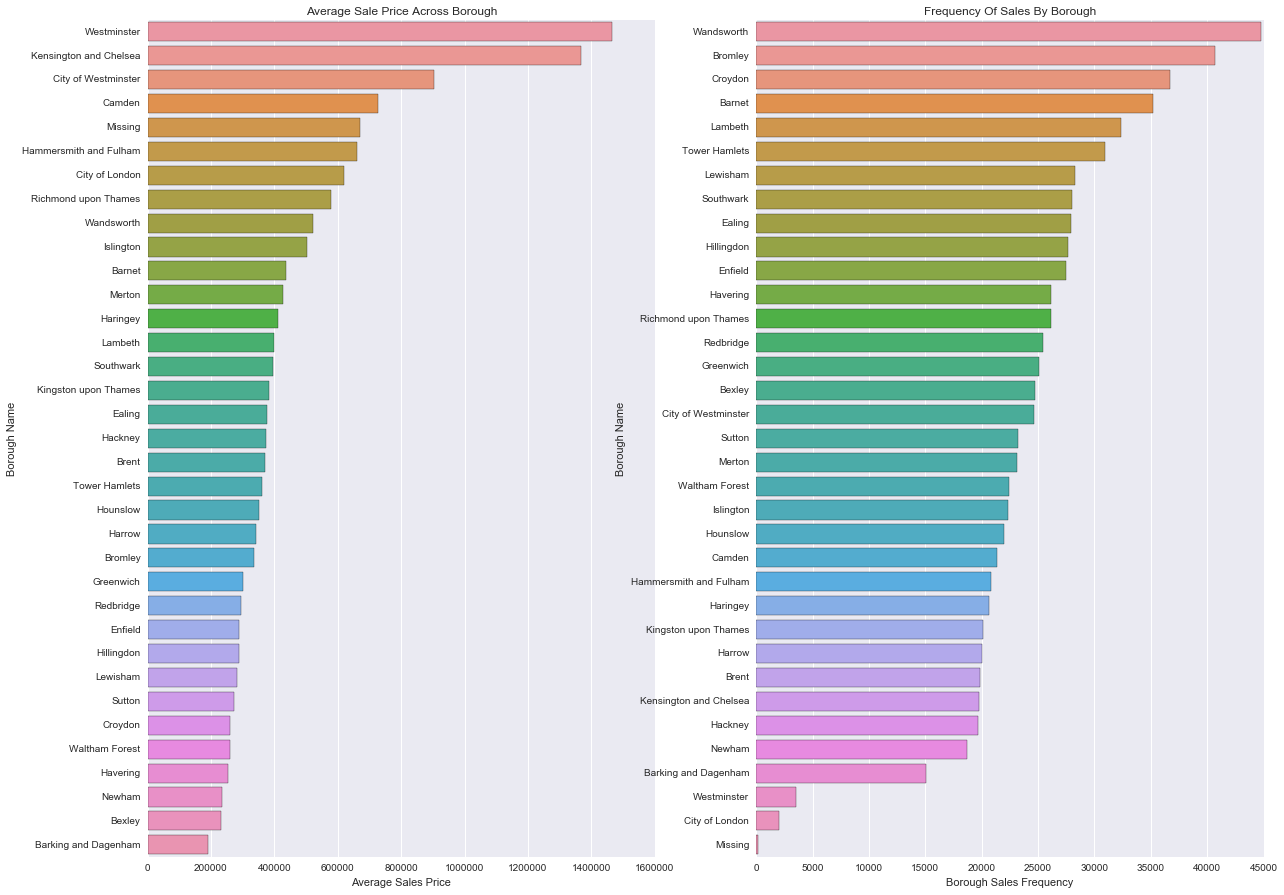

In [71]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(20,15)
boroughGroupedData = pandas.DataFrame(data.groupby("borough_name")["price"].mean()).reset_index()
boroughGroupeSortedData = boroughGroupedData.sort_values(by="price",ascending=False)
sn.barplot(data=boroughGroupeSortedData,x="price",y="borough_name",ax=ax1,orient="h")
ax1.set(xlabel='Average Sales Price', ylabel='Borough Name',title="Average Sale Price Across Borough")

boroughData = pandas.DataFrame(data.borough_name.value_counts())
boroughData["borough_original_name"] = boroughData.index
sn.barplot(data=boroughData,x="borough_name",y="borough_original_name",ax=ax2,orient="h")
ax2.set(xlabel='Borough Sales Frequency', ylabel='Borough Name',title= "Frequency Of Sales By Borough")

## Sales And Frequency Across Towns

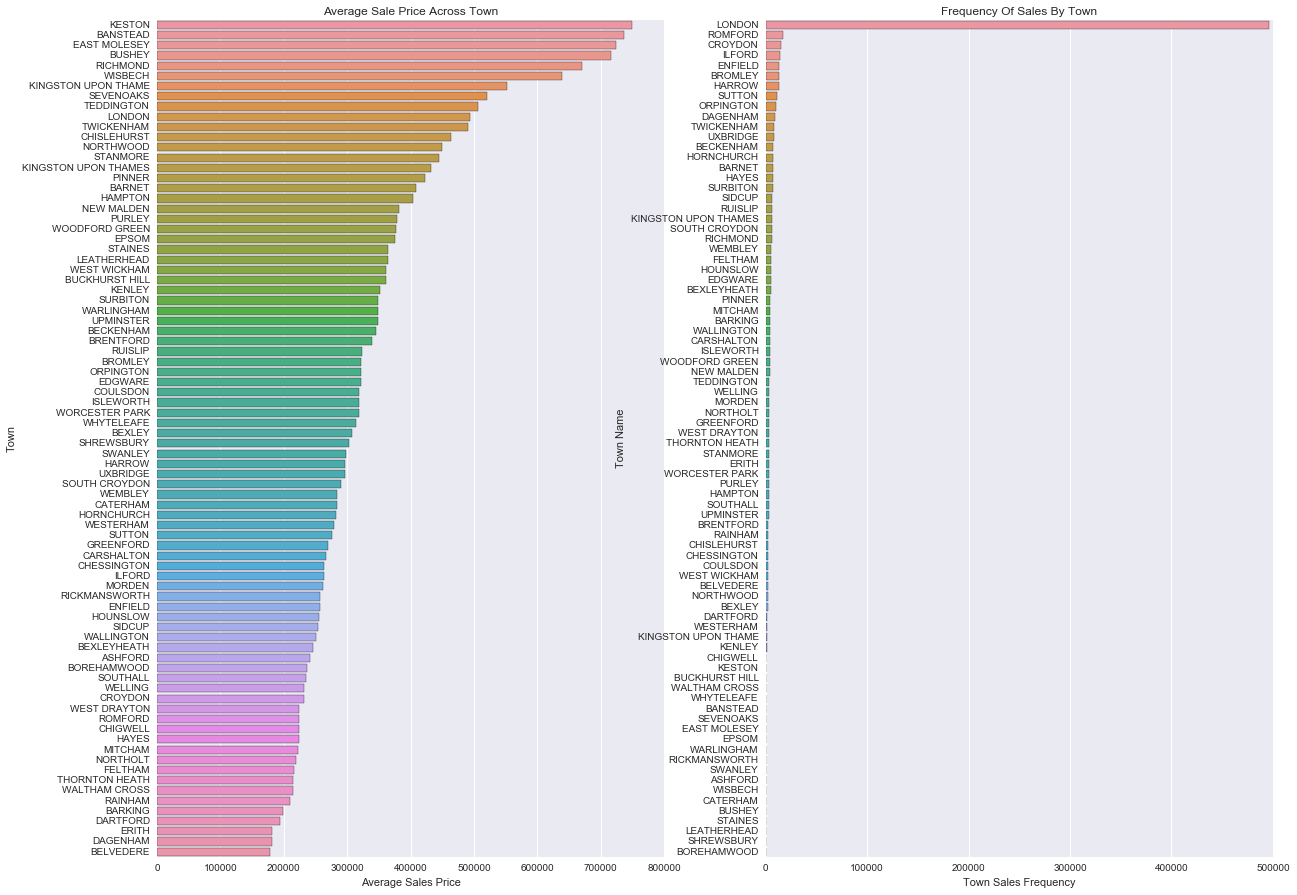

In [72]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(20,15)

townGroupedData = pandas.DataFrame(data.groupby("town")["price"].mean()).reset_index()
townGroupeSortedData = townGroupedData.sort_values(by="price",ascending=False)
sn.barplot(data=townGroupeSortedData,x="price",y="town",ax=ax1,orient="h")
ax1.set(xlabel='Average Sales Price', ylabel='Town',title="Average Sale Price Across Town")


townData = pandas.DataFrame(data.town.value_counts())
townData["town_name"] = townData.index
sn.barplot(data=townData,x="town",y="town_name",ax=ax2,orient="h")
ax2.set(xlabel='Town Sales Frequency', ylabel='Town Name',title= "Frequency Of Sales By Town")

## Sales Across Year

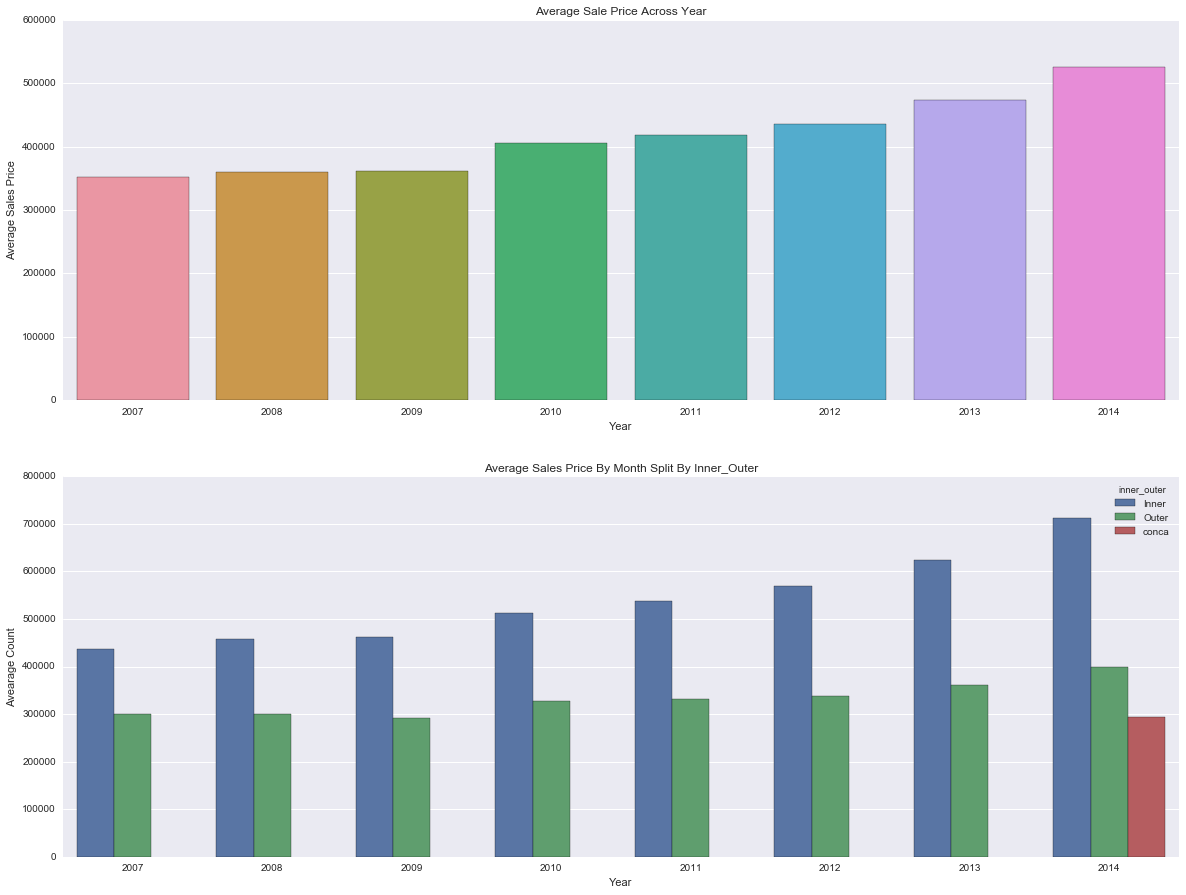

In [9]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)
yearGroupedData = pandas.DataFrame(data.groupby("year")["price"].mean()).reset_index()
yearGroupeSortedData = yearGroupedData.sort_values(by="price",ascending=False)
sn.barplot(data=yearGroupeSortedData,x="year",y="price",ax=ax1)
ax1.set(xlabel='Year', ylabel='Average Sales Price',title="Average Sale Price Across Year")

yearInnerAggregated = pandas.DataFrame(data.groupby(["year","inner_outer"],sort=True)["price"].mean()).reset_index()
yearInnerSorted = yearInnerAggregated.sort_values(by=["price"],ascending=False)
sn.barplot(data=yearInnerSorted,x="year",y="price",hue="inner_outer",ax=ax2)
ax2.set(xlabel='Year', ylabel='Avearage Count',title="Average Sales Price By Month Split By Inner_Outer")

## Sales Across Month

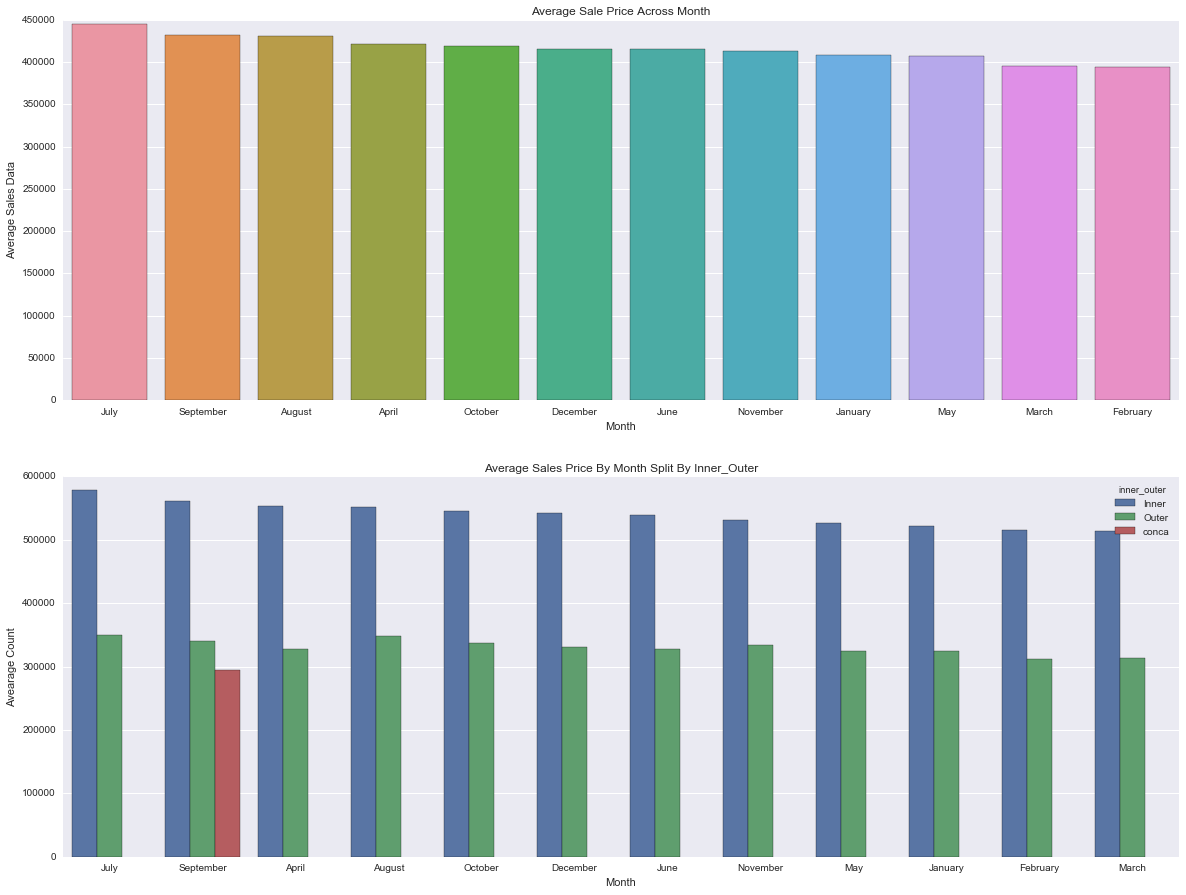

In [10]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)
monthGroupedData = pandas.DataFrame(data.groupby("month_string")["price"].mean()).reset_index()
monthGroupeSortedData = monthGroupedData.sort_values(by="price",ascending=False)
sn.barplot(data=monthGroupeSortedData,x="month_string",y="price",ax=ax1)
ax1.set(xlabel='Month', ylabel='Average Sales Data',title="Average Sale Price Across Month")

monthInnerAggregated = pandas.DataFrame(data.groupby(["month_string","inner_outer"],sort=True)["price"].mean()).reset_index()
monthInnerSorted = monthInnerAggregated.sort_values(by=["price"],ascending=False)
sn.barplot(data=monthInnerSorted,x="month_string",y="price",hue="inner_outer",ax=ax2)
ax2.set(xlabel='Month', ylabel='Avearage Count',title="Average Sales Price By Month Split By Inner_Outer")

## Distribution Of Price

                      price_bins      price_bins_range
(-44949, 2757450]         820999     (-44949, 2757450]
(2757450, 5504900]          4684    (2757450, 5504900]
(5504900, 8252350]           754    (5504900, 8252350]
(8252350, 10999800]          189   (8252350, 10999800]
(10999800, 13747250]         117  (10999800, 13747250]
(13747250, 16494700]          44  (13747250, 16494700]
(16494700, 19242150]          33  (16494700, 19242150]
(19242150, 21989600]          14  (19242150, 21989600]
(21989600, 24737050]           6  (21989600, 24737050]
(24737050, 27484500]           5  (24737050, 27484500]
                price_log_bins price_log_bins_range
(5.122, 5.496]          427355        132434-313328
(5.496, 5.87]           295427        313328-741310
(5.87, 6.244]            63061       741310-1753880
(4.748, 5.122]           26203         55975-132434
(6.244, 6.618]           12376      1753880-4149540
(6.618, 6.992]            2004      4149540-9817479
(6.992, 7.366]             273 

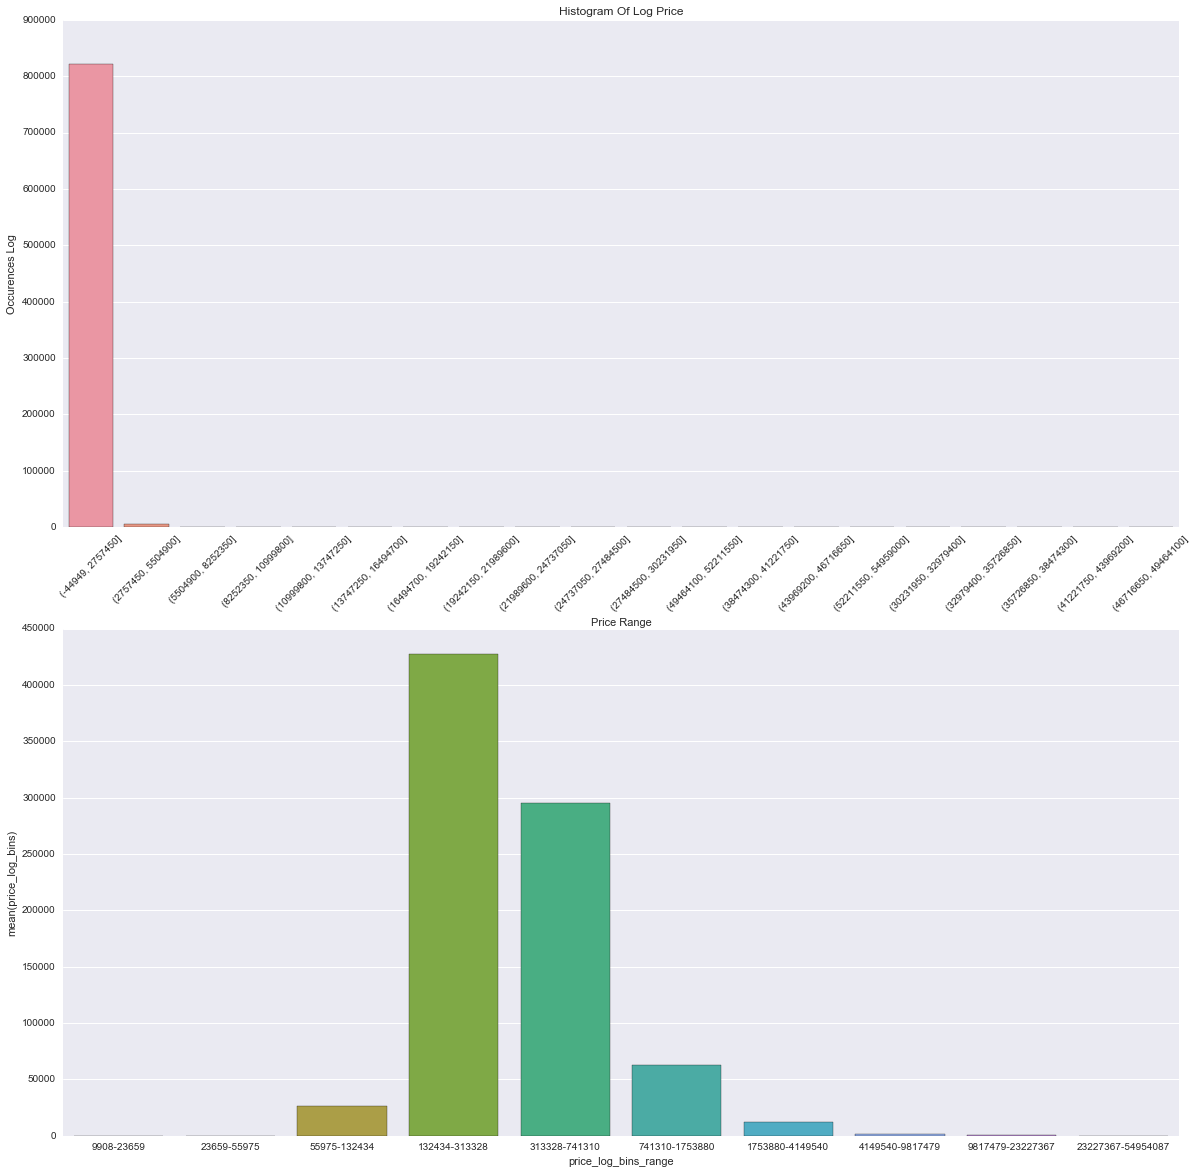

In [60]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,20)

data['price_bins'] = pandas.cut(data['price'], bins=20)
priceBins = pandas.DataFrame(data.price_bins.value_counts())
priceBins["price_bins_range"] = priceBins.index
sn.barplot(data=priceBins,x="price_bins_range",y="price_bins",ax=ax1,orient="v")
ax1.set(xlabel='Price Range', ylabel='Occurences',title="Histogram Of Price")
ax1.set_xticklabels(priceBins.price_bins_range.unique(),rotation=45)

data["price_log"] = data.price.apply(lambda x:math.log10(x))
data['price_log_bins'] = pandas.cut(data['price_log'], bins=10)
priceLogBins = pandas.DataFrame(data.price_log_bins.value_counts())
priceLogBins["price_log_bins_range"] = priceLogBins.index
priceLogBins["price_log_bins_range"] = priceLogBins.price_log_bins_range.apply(lambda x : str(10**float(x.split(",")[0][1:])).split(".")[0] + "-" + str(10**float(x.split(",")[1][:-1])).split(".")[0] )
sn.barplot(data=priceLogBins,x="price_log_bins_range",y="price_log_bins",ax=ax2,orient="v")
ax1.set(xlabel='Price Range', ylabel='Occurences Log',title="Histogram Of Log Price")

print priceBins.head(10)
print priceLogBins.head(30)

## Visualizing Outliers In Price

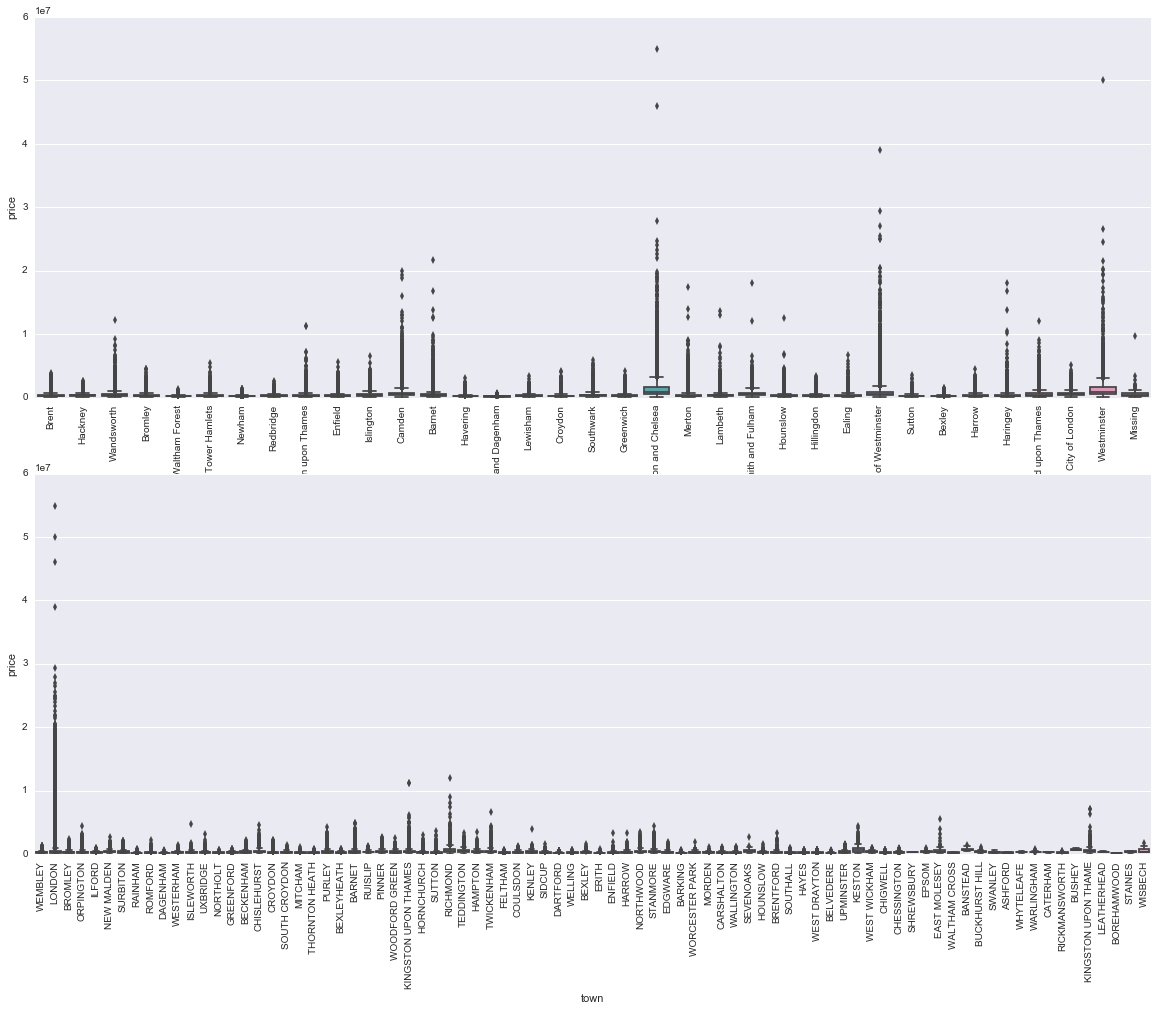

In [31]:
fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20,15)
plt.ioff()
data["borough_name"] = data.borough_name.apply(lambda x:x if len(x) > 1 else "Missing")
sn.boxplot(data=data,y="price",x="borough_name",orient="v",ax=ax1)
ax1.set_xticklabels(data.borough_name.unique(),rotation="vertical")
sn.boxplot(data=data,y="price",x="town",orient="v",ax=ax2)
ax2.set_xticklabels(data.town.unique(),rotation="vertical")
plt.show()